In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Cleanup

#### Import source

In [3]:
df=pd.read_csv('./source/equinox2020.csv')
df

,NGA,Polity,Section,Subsection,Variable,Value.From,Value.To,Date.From,Date.To,Fact.Type,Value.Note,Date.Note
0,Kachi Plain,AfDurrn,General variables,NaN,RA,Stephen Dean,NaN,NaN,NaN,complex,list,NaN
1,Kachi Plain,AfDurrn,General variables,NaN,RA,Alice Williams,NaN,NaN,NaN,complex,list,NaN
2,Kachi Plain,AfDurrn,General variables,NaN,Original name,Durrani Empire,NaN,NaN,NaN,simple,simple,NaN
3,Kachi Plain,AfDurrn,General variables,NaN,Alternative names,Sadozai Kingdom,NaN,NaN,NaN,complex,list,NaN
4,Kachi Plain,AfDurrn,General variables,NaN,Alternative names,Last Afghan Empire,NaN,NaN,NaN,complex,list,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
47472,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing religion adopted by elites,present,NaN,NaN,NaN,simple,simple,NaN
47473,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing religion adopted by commoners,present,NaN,NaN,NaN,simple,simple,NaN
47474,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing enforcement in afterlife,present,NaN,NaN,NaN,simple,simple,NaN
47475,Yemeni Coastal Plain,YeZiyad,Religion and Normative Ideology,Moralizing Supernatural Powers,Moralizing enforcement in this life,present,NaN,NaN,NaN,simple,simple,NaN


#### Make a subset related to population data only:

In [4]:
df_pops = df[df['Variable']=='Polity Population'][['NGA', 'Polity', 'Value.From', 'Value.To', 'Date.From', 'Date.To']]
df_pops.set_index('Polity', inplace=True)
df_pops.rename({'Value.From': 'Pop_Min', 'Value.To': 'Pop_Max', 'Date.From': 'From_Year', 'Date.To': 'To_Year'}, axis=1, inplace=True)
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000,2000000,200BCE,NaN
AfHepht,Sogdiana,26500000,NaN,500CE,NaN
AfKidar,Sogdiana,1000000,1500000,NaN,NaN
AfKushn,Sogdiana,12500000,13500000,100CE,NaN
AfKushn,Sogdiana,14000000,15000000,200CE,NaN
...,...,...,...,...,...
YeHmyr1,Yemeni Coastal Plain,300000,500000,NaN,NaN
YeHmyr2,Yemeni Coastal Plain,300000,500000,NaN,NaN
YeLBA**,Yemeni Coastal Plain,unknown,NaN,NaN,NaN


#### Drop all rows where there is no actually population data:

In [5]:
df_pops.drop(df_pops[df_pops['Pop_Min'].isin(['unknown', 'suspected unknown']) | df_pops['Pop_Max'].isin(['unknown', 'suspected unknown'])].index, inplace=True)
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000,2000000,200BCE,NaN
AfHepht,Sogdiana,26500000,NaN,500CE,NaN
AfKidar,Sogdiana,1000000,1500000,NaN,NaN
AfKushn,Sogdiana,12500000,13500000,100CE,NaN
AfKushn,Sogdiana,14000000,15000000,200CE,NaN
...,...,...,...,...,...
UzSamnd,Sogdiana,6000000,NaN,900CE,NaN
UzSogdi,Sogdiana,15000,50000,NaN,NaN
UzTimur,Sogdiana,49000000,NaN,1400CE,NaN


#### Replace missing values:

In [6]:
df_pops.fillna(value='0', inplace=True)
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000,2000000,200BCE,0
AfHepht,Sogdiana,26500000,0,500CE,0
AfKidar,Sogdiana,1000000,1500000,0,0
AfKushn,Sogdiana,12500000,13500000,100CE,0
AfKushn,Sogdiana,14000000,15000000,200CE,0
...,...,...,...,...,...
UzSamnd,Sogdiana,6000000,0,900CE,0
UzSogdi,Sogdiana,15000,50000,0,0
UzTimur,Sogdiana,49000000,0,1400CE,0


#### Let's deal with some values that represent a range as opposite to a single number:

In [7]:
df_pops[df_pops['Pop_Min'].str.contains('-')]

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
CnEHan*,Middle Yellow River Valley,480000-53869588,0,126CE,141CE
CnEHan*,Middle Yellow River Valley,49150220-49730550,0,142CE,144CE


#### We will now assign the mean of the range instead of the range itself.
#### But first we will correct an obvious error in the dataset:  it's quite clear that 48000000 should be used instead of 480000: 

In [8]:
df_pops.at['CnEHan*', 'Pop_Min'] = str(np.mean([40800000, 53869588]))
df_pops.at['CnEHan*', 'Pop_Min'] = str(np.mean([49150220, 49730550]))
df_pops[df_pops['Pop_Min'].str.contains('-')].count()

NGA          0
Pop_Min      0
Pop_Max      0
From_Year    0
To_Year      0
dtype: int64

#### Remove 'BCE' and 'CE' (while saving indexes of correspoding rows):

In [9]:
bce_from = df_pops[df_pops['From_Year'].str.contains('BCE')==True].index
bce_to = df_pops[df_pops['To_Year'].str.contains('BCE')==True].index

In [10]:
df_pops['From_Year'].where(df_pops['From_Year'].str.contains('BCE')!=True, other=df_pops['From_Year'].str.replace('BCE', ''), inplace=True)
df_pops['To_Year'].where(df_pops['To_Year'].str.contains('BCE')!=True, other=df_pops['To_Year'].str.replace('BCE', ''), inplace=True)
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000,2000000,200,0
AfHepht,Sogdiana,26500000,0,500CE,0
AfKidar,Sogdiana,1000000,1500000,0,0
AfKushn,Sogdiana,12500000,13500000,100CE,0
AfKushn,Sogdiana,14000000,15000000,200CE,0
...,...,...,...,...,...
UzSamnd,Sogdiana,6000000,0,900CE,0
UzSogdi,Sogdiana,15000,50000,0,0
UzTimur,Sogdiana,49000000,0,1400CE,0


In [11]:
df_pops['From_Year'].where(df_pops['From_Year'].str.contains('CE')!=True, other=df_pops['From_Year'].str.replace('CE', ''), inplace=True)
df_pops['To_Year'].where(df_pops['To_Year'].str.contains('CE')!=True, other=df_pops['To_Year'].str.replace('CE', ''), inplace=True)
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000,2000000,200,0
AfHepht,Sogdiana,26500000,0,500,0
AfKidar,Sogdiana,1000000,1500000,0,0
AfKushn,Sogdiana,12500000,13500000,100,0
AfKushn,Sogdiana,14000000,15000000,200,0
...,...,...,...,...,...
UzSamnd,Sogdiana,6000000,0,900,0
UzSogdi,Sogdiana,15000,50000,0,0
UzTimur,Sogdiana,49000000,0,1400,0


#### Convert years values to integers:

In [12]:
df_pops['From_Year'] = pd.to_numeric(df_pops['From_Year'])
df_pops['To_Year'] = pd.to_numeric(df_pops['To_Year'])
df_pops['Pop_Min'] = pd.to_numeric(df_pops['Pop_Min'])
df_pops['Pop_Max'] = pd.to_numeric(df_pops['Pop_Max'])

#### Assign negative signs to 'BCE' values:

In [13]:
df_pops.loc[bce_from,'From_Year'] = -df_pops.loc[bce_from,'From_Year']
df_pops.loc[bce_to,'To_Year'] = -df_pops.loc[bce_to,'To_Year']

In [14]:
df_pops

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
AfGrBct,Sogdiana,1500000.0,2000000,-200,0
AfHepht,Sogdiana,26500000.0,0,500,0
AfKidar,Sogdiana,1000000.0,1500000,0,0
AfKushn,Sogdiana,12500000.0,13500000,100,0
AfKushn,Sogdiana,14000000.0,15000000,200,0
...,...,...,...,...,...
UzSamnd,Sogdiana,6000000.0,0,900,0
UzSogdi,Sogdiana,15000.0,50000,0,0
UzTimur,Sogdiana,49000000.0,0,1400,0


#### Save as pickle:

In [15]:
df_pops.to_pickle('./populations.pkl')

## Analysis

In [16]:
df_pops.sort_values('NGA', inplace=True)

<AxesSubplot:xlabel='From_Year', ylabel='Pop_Min'>

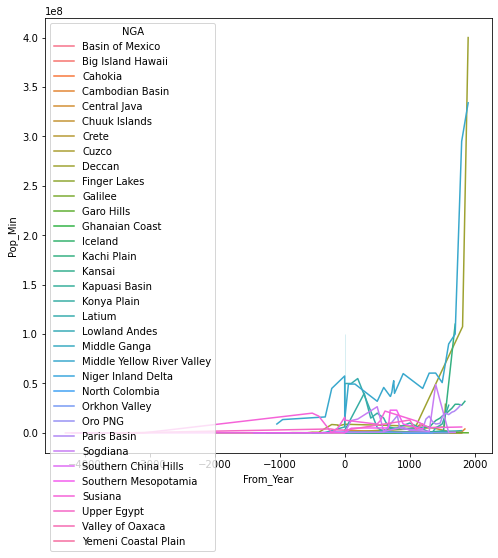

In [27]:
plt.figure(figsize=(8, 8))
sns.lineplot(data=df_pops, x='From_Year', y='Pop_Min', hue='NGA')

In [28]:
popmax = df_pops.groupby('NGA')['Pop_Min'].max()
popmin = df_pops.groupby('NGA')['Pop_Min'].min()
rate = ((popmax / popmin - 1) * 100)
df_rate = pd.DataFrame({'NGA': df_pops['NGA'].unique(), 'Population Min': popmin.to_list(), 'Population Max': popmax.to_list(), 'Rate(%)': rate.to_list()})
df_rate.set_index('NGA', inplace=True)
df_rate.sort_values('Rate(%)', inplace=True, ascending=False)
df_rate.head(10)

,Population Min,Population Max,Rate(%)
NGA,,,
Deccan,500.0,400000000.0,7.999990e+07
Paris Basin,100.0,28500000.0,2.849990e+07
Kachi Plain,450.0,110000000.0,2.444434e+07
Kansai,400.0,32000000.0,7.999900e+06
Susiana,800.0,30000000.0,3.749900e+06
Middle Yellow River Valley,10000.0,334000000.0,3.339900e+06
Niger Inland Delta,200.0,4000000.0,1.999900e+06
Konya Plain,2500.0,40000000.0,1.599900e+06
Sogdiana,15000.0,49000000.0,3.265667e+05


In [29]:
df_rate.shape

(34, 3)

### Taking only 10 'top performers' in terms of rate of population growth

In [30]:
df_top = df_rate.head(10)

Text(0.5, 1.0, "Rate of Total Population Growth per Top 10 NGA's")

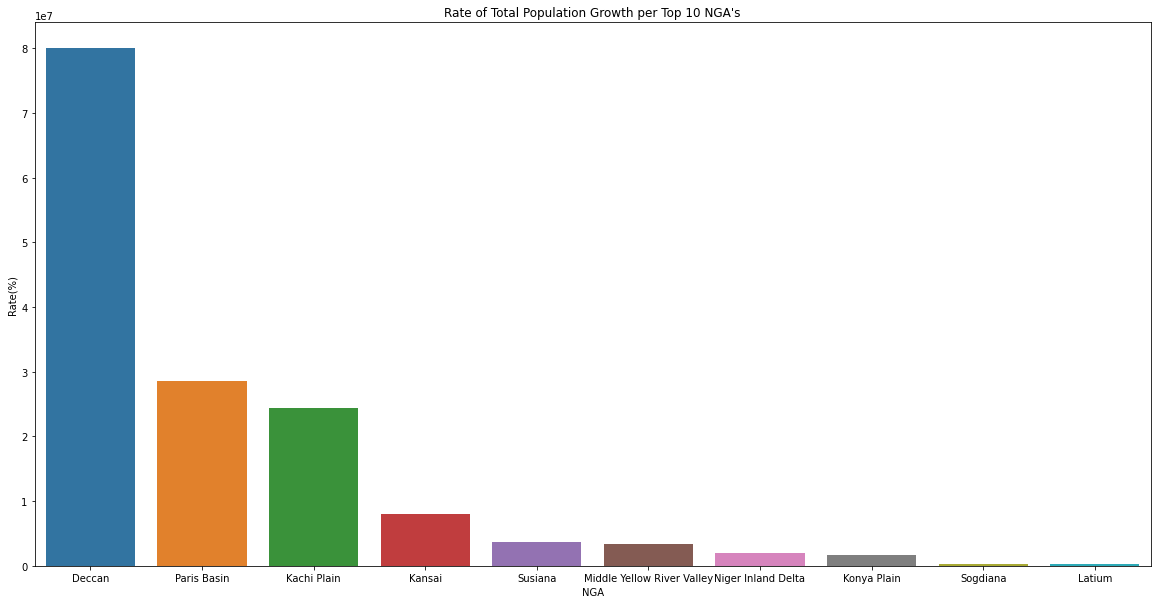

In [32]:
plt.figure(figsize=(20, 10))
plot=sns.barplot(data=df_top, x=df_top.index, y='Rate(%)')
plot.set_title('Rate of Total Population Growth per Top 10 NGA\'s')

### Population changes in the selected regions in the first millenium CE

<ipython-input-22-d1a633d29ad1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000


Text(0.5, 1.0, 'Population Changes Before 1000 CE')

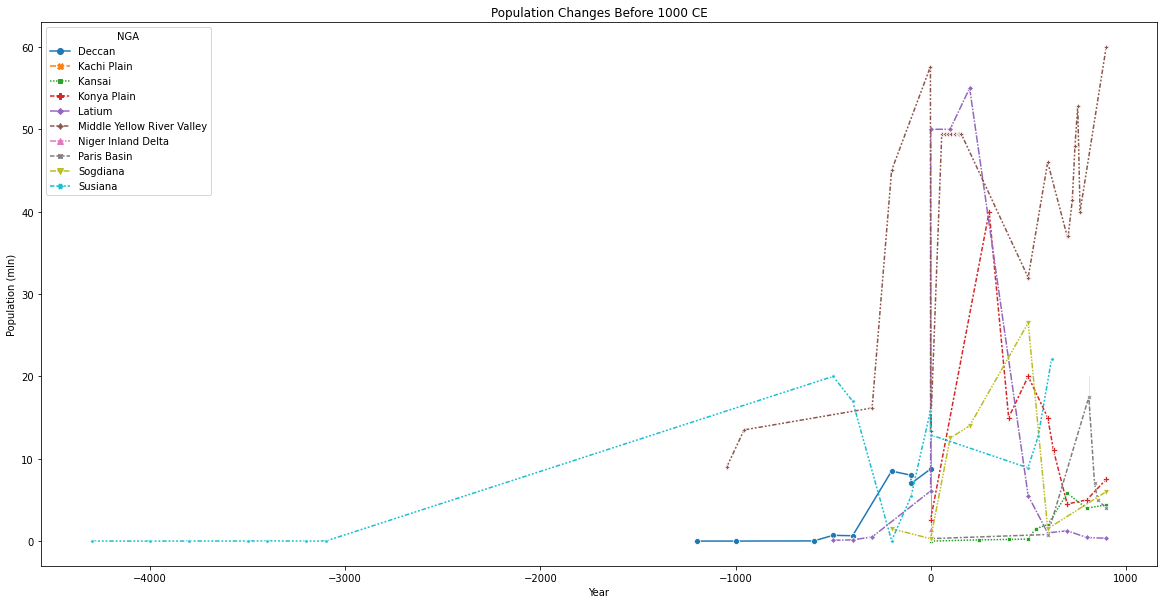

In [22]:
df_plot = df_pops[df_pops['NGA'].isin(df_top.index) & (df_pops['From_Year']<1000)]
df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain')
plot=sns.lineplot(data=df_plot, x='From_Year', y='Pop_Min', hue='NGA', style='NGA', markers=True, legend='full')
plot.set_xlabel('Year')
plot.set_ylabel('Population (mln)')
plot.set_title('Population Changes Before 1000 CE')

## Population changes in the same group in the second millenium

<ipython-input-23-faa16f37917b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000


Text(0.5, 1.0, 'Population Changes From 1000 to 1900 CE')

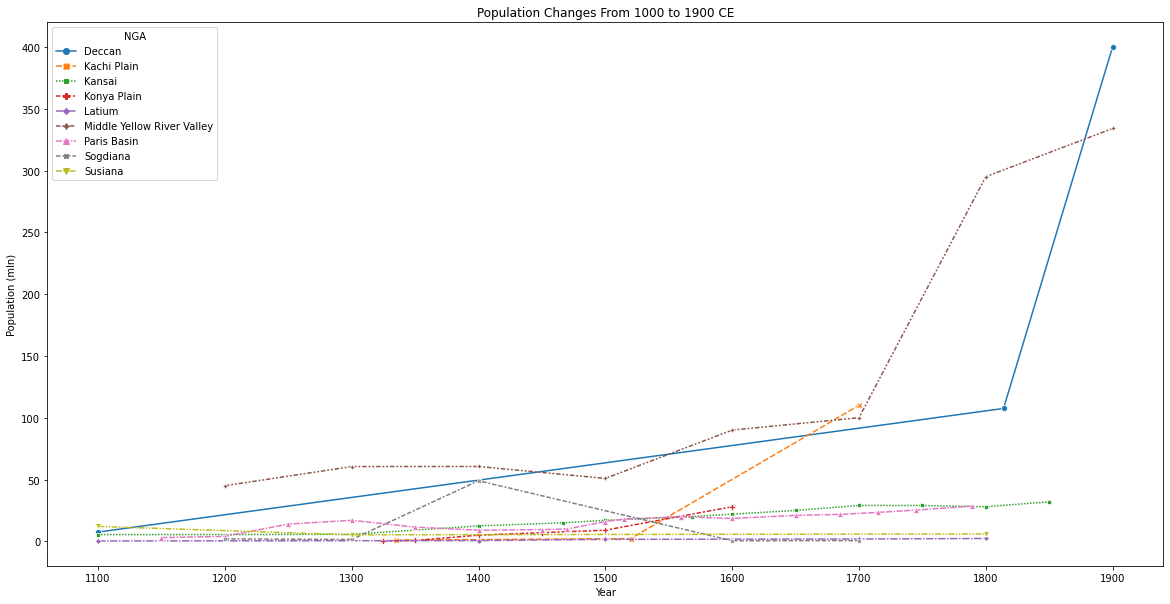

In [23]:
df_plot = df_pops[(df_pops['NGA'].isin(df_top.index)) & (df_pops['From_Year']>1000)]
df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain')
plot=sns.lineplot(data=df_plot, x='From_Year', y='Pop_Min', hue='NGA', style='NGA', markers=True, legend='full')
plot.set_xlabel('Year')
plot.set_ylabel('Population (mln)')
plot.set_title('Population Changes From 1000 to 1900 CE')

### Total changes throughout history

<ipython-input-24-91888e5c2ef1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000


Text(0.5, 1.0, 'Population Changes Throughout Entire Historical Timeline')

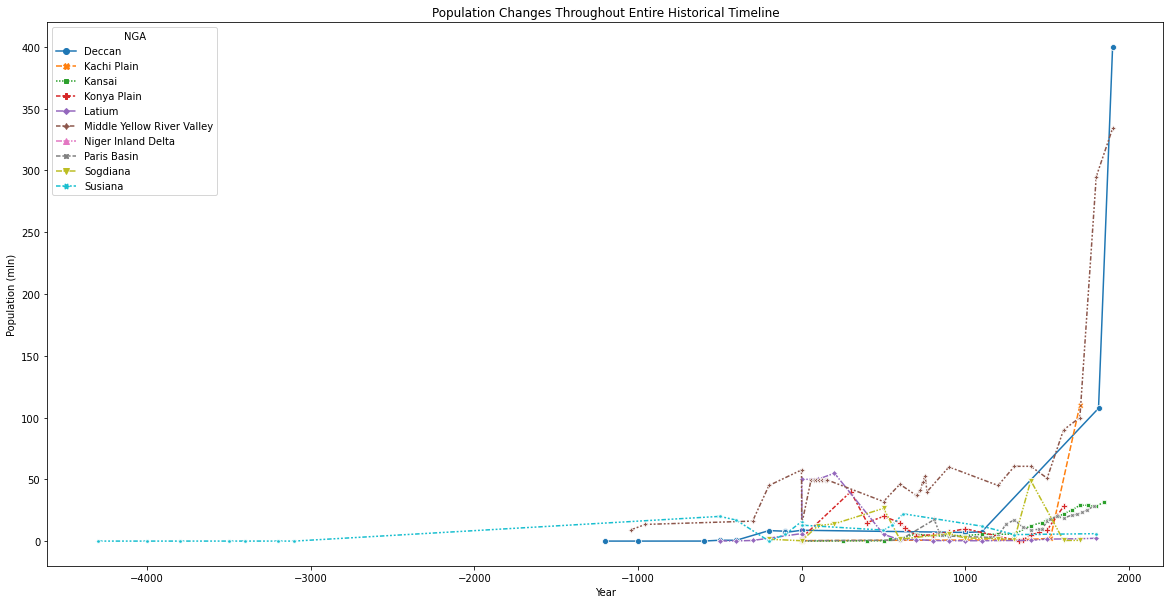

In [24]:
df_plot = df_pops[(df_pops['NGA'].isin(df_top.index))]
df_plot['Pop_Min'] = df_plot['Pop_Min']/1000000
plt.figure(figsize=(20, 10))
plt.ticklabel_format(style='plain')
plot=sns.lineplot(data=df_plot, x='From_Year', y='Pop_Min', hue='NGA', style='NGA', markers=True, legend='full')
plot.set_xlabel('Year')
plot.set_ylabel('Population (mln)')
plot.set_title('Population Changes Throughout Entire Historical Timeline')

In [25]:
df_pops[df_pops['NGA']=='Middle Yellow River Valley'].sort_values('Pop_Min')

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
CnYngsh,Middle Yellow River Valley,10000.0,30000,0,0
CnErlit,Middle Yellow River Valley,54000.0,82000,0,0
CnErlig,Middle Yellow River Valley,2000000.0,3000000,0,0
CnShang,Middle Yellow River Valley,5000000.0,0,0,0
CnWZhou,Middle Yellow River Valley,9000000.0,12000000,-1045,-957
CnWZhou,Middle Yellow River Valley,13500000.0,0,-956,-795
CnErJin,Middle Yellow River Valley,16163863.0,0,-300,0
CnNWei*,Middle Yellow River Valley,32000000.0,0,500,0
CnTangE,Middle Yellow River Valley,37000000.0,0,705,0


In [26]:
df_pops[df_pops['NGA']=='Paris Basin'].sort_values('Pop_Min')

,NGA,Pop_Min,Pop_Max,From_Year,To_Year
Polity,,,,,
FrHallA,Paris Basin,100.0,1000,0,0
FrBeakr,Paris Basin,800.0,1200,0,0
FrAtlBA,Paris Basin,1000.0,2000,0,0
FrHallC,Paris Basin,3000.0,5000,0,0
FrTeneC,Paris Basin,70000.0,80000,0,0
FrTeneB,Paris Basin,70000.0,80000,0,0
FrCaptE,Paris Basin,500000.0,1000000,0,0
FrMervM,Paris Basin,800000.0,1200000,600,0
FrMervL,Paris Basin,800000.0,1200000,0,0
